In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
data=pd.read_csv('insurance.csv')

            Display Top 5 Rows Of The Dataset

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


            Display Last 5 Rows Of The Dataset

In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


           Shape Of The Dataset(Number Of Rows And Columns)

In [5]:
data.shape

(1338, 7)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1338
Number of Columns 7


           Total Number Of Rows,Columns,Datatypes Of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


             Check Null Values In The Dataset

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

            Statistics About The Dataset

In [9]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


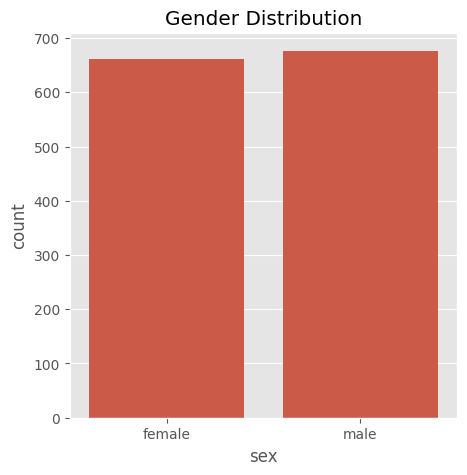

In [10]:
from matplotlib import pyplot as plt, style
import seaborn as sns
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex',data=data)
plt.title('Gender Distribution')
plt.show()

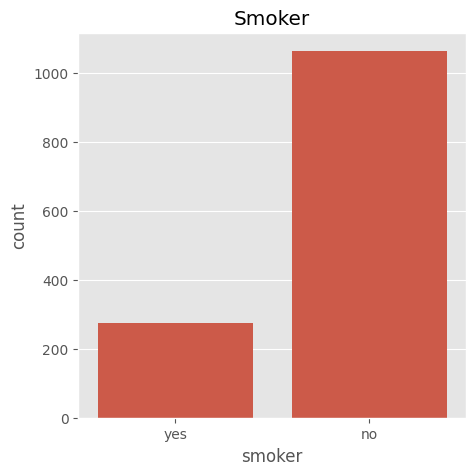

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=data)
plt.title('Smoker')
plt.show()

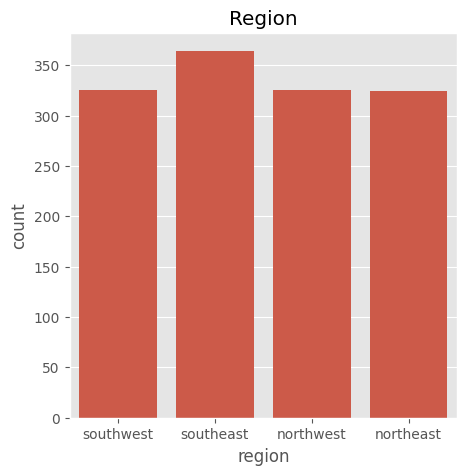

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=data)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

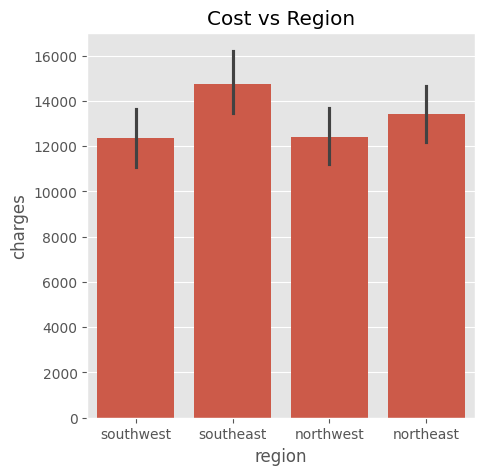

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=data)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

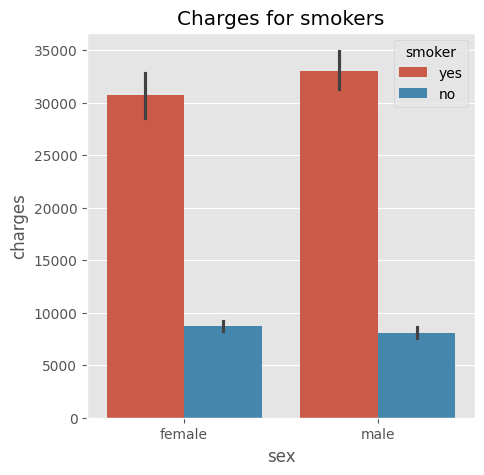

In [14]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=data)
plt.title('Charges for smokers')

<Axes: xlabel='region', ylabel='charges'>

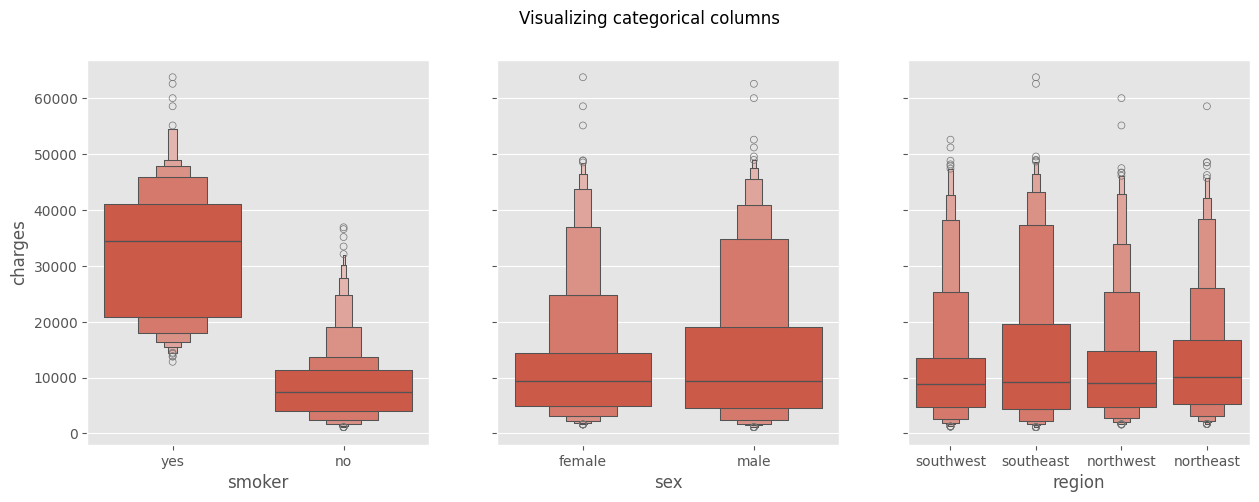

In [15]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=data, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=data, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=data, ax=axes[2])

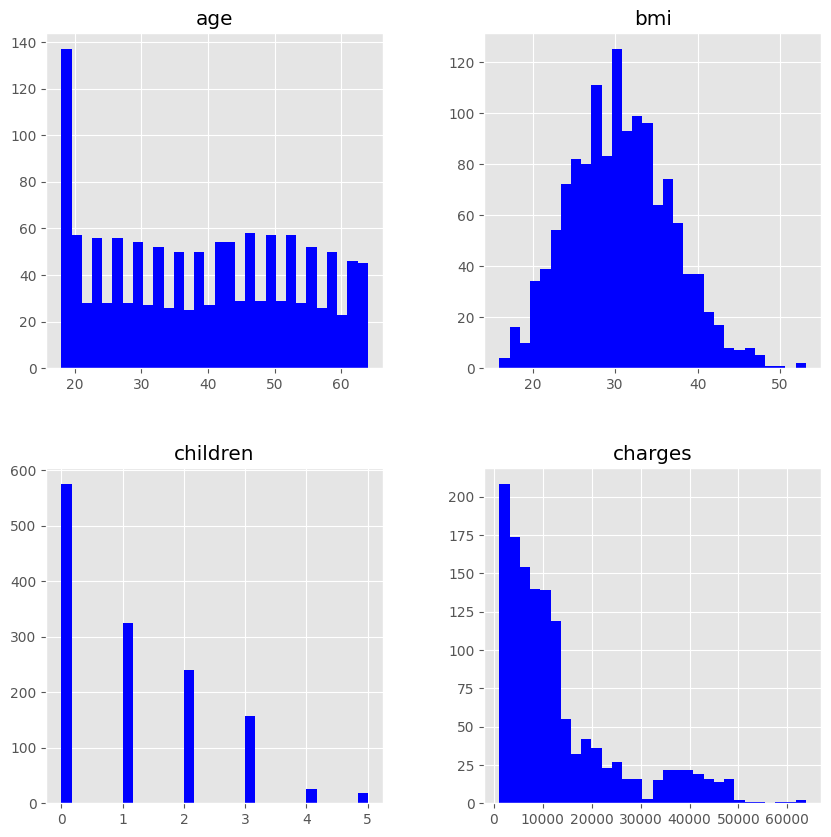

In [16]:
data[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

            Converting Columns From String['sex','smoker','region'] To Numerical Values

In [17]:
data['sex'] = data['sex'].apply({'male':1, 'female':0}.get)
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


            Store Feature Matrix in X and Response(Target) in Vector y

In [19]:
X = data.drop(['charges', 'sex'], axis=1)
y = data.charges

            Train/Test Split

          i) Split Data Into Two Parts: A Training Set And A Testing Set
          ii) Train The Model(s) On The Training Set
          iii) Test The Model(s) On The Testing Set

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
y_train

332     13429.03540
355     24603.04837
138     27322.73386
381     42303.69215
292     42112.23560
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 936, dtype: float64

              Import The Models

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

              Model Training

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

              Prediction on Test Data

In [25]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [26]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8989.005625,9504.196530,9291.338128,10326.194184
887,5272.17580,7125.962189,9450.252213,5256.463910,5748.758519
890,29330.98315,36996.664796,9599.642669,28005.995683,29407.250719
1293,9301.89355,9543.841342,9510.785646,11164.119678,9822.418675
259,33750.29180,26961.073879,9383.162262,34733.811878,34294.979661
...,...,...,...,...,...
701,9541.69555,16191.290426,9540.344034,12183.331112,11742.734533
672,4399.73100,6687.323375,9450.053889,4844.474181,6015.680176
1163,2200.83085,2123.871955,9380.390997,2985.100609,3026.985319
1103,11363.28320,14640.825191,9581.800792,11871.284739,12527.800737


              Compare Performance Visually

In [27]:
import matplotlib.pyplot as plt

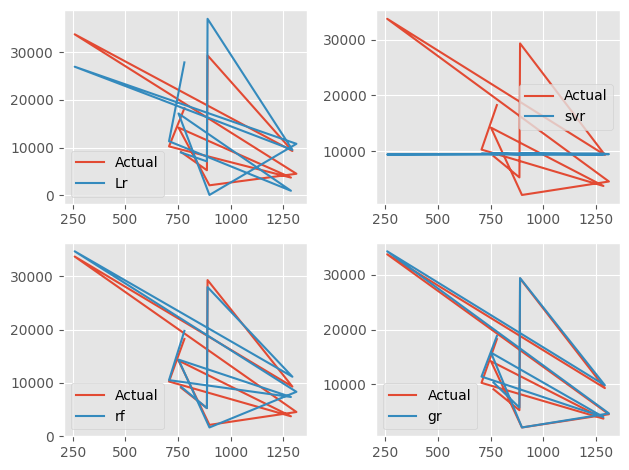

In [28]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

               Evaluating the Algorithm    

In [29]:
from sklearn import metrics

In [30]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [31]:
print(score1,score2,score3,score4)


0.7697211527941855 -0.08162002479967256 0.8565160555485094 0.8710754620756469


In [32]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [33]:
print(s1,s2,s3,s4)

4151.409812177044 8227.244856225088 2466.8243142664182 2401.1218454679106


           Predict Charges For New Customer

In [34]:
data = {'age':40,'bmi':40.3, 'children':4, 'smoker':0, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,40,40.3,4,0,2


In [35]:
cost_pred = gr.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [11310.66694756]


             Save Model Using Joblib

In [36]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [37]:
import joblib

In [38]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [39]:
model=joblib.load('model_joblib_gr')

In [40]:
model.predict(cust_df)

array([8154.72848776])